In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]]) / 255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]]) / 255

x_train = tf.expand_dims(x_train, axis = 3, name = None)
x_test = tf.expand_dims(x_test, axis = 3, name = None)
x_train = tf.repeat(x_train, 3, axis = 3)
x_test = tf.repeat(x_test, 3, axis = 3)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


In [5]:
model_Res152 = tf.keras.applications.ResNet152V2(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
for layer in model_Res152.layers:
    layer.trainable = False
    
x = layers.Flatten()(model_Res152.output)
predictions = layers.Dense(10, activation = 'softmax')(x)

head_model_Res152 = Model(inputs = model_Res152.input, outputs = predictions)
head_model_Res152.compile(optimizer = 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
head_model_Res152.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 8, 8, 64)     16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 4, 4, 512)    0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 6, 6, 128)   0           ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 4, 4, 128)    147456      ['conv3_block5_2_pad[0][0]']     
                                                                                                  
 conv3_block5_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block5_2_conv[0][0]']    
 ization) 

 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 4, 4, 512)   0           ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 4, 4, 128)    65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv3_block8_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block8_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_pad (ZeroPaddin  (None, 4, 4, 256)   0           ['conv4_block5_1_relu[0][0]']    
 g2D)                                                                                             
          

 conv4_block7_out (Add)         (None, 2, 2, 1024)   0           ['conv4_block6_out[0][0]',       
                                                                  'conv4_block7_3_conv[0][0]']    
                                                                                                  
 conv4_block8_preact_bn (BatchN  (None, 2, 2, 1024)  4096        ['conv4_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_block8_preact_relu (Acti  (None, 2, 2, 1024)  0           ['conv4_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 2, 2, 256)    262144      ['conv4_block8_preact_relu[0][0]'
          

 conv4_block10_2_conv (Conv2D)  (None, 2, 2, 256)    589824      ['conv4_block10_2_pad[0][0]']    
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, 2, 2, 1024)   263168      ['conv4_block10_2_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_1_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_pad (ZeroPaddi  (None, 4, 4, 256)   0           ['conv4_block13_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                                                  'conv4_block15_3_conv[0][0]']   
                                                                                                  
 conv4_block16_preact_bn (Batch  (None, 2, 2, 1024)  4096        ['conv4_block15_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block16_preact_relu (Act  (None, 2, 2, 1024)  0           ['conv4_block16_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 256)    262144      ['conv4_block16_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block18_2_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block18_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_3_conv (Conv2D)  (None, 2, 2, 1024)   263168      ['conv4_block18_2_relu[0][0]']   
                                                                                                  
 conv4_block18_out (Add)        (None, 2, 2, 1024)   0           ['conv4_block17_out[0][0]',      
          

 conv4_block21_1_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block21_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_1_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block21_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_2_pad (ZeroPaddi  (None, 4, 4, 256)   0           ['conv4_block21_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block21_2_conv (Conv2D)  (None, 2, 2, 256)    589824      ['conv4_block21_2_pad[0][0]']    
          

                                                                                                  
 conv4_block24_preact_bn (Batch  (None, 2, 2, 1024)  4096        ['conv4_block23_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block24_preact_relu (Act  (None, 2, 2, 1024)  0           ['conv4_block24_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, 2, 2, 256)    262144      ['conv4_block24_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block26_2_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block26_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block26_2_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block26_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block26_3_conv (Conv2D)  (None, 2, 2, 1024)   263168      ['conv4_block26_2_relu[0][0]']   
                                                                                                  
 conv4_block26_out (Add)        (None, 2, 2, 1024)   0           ['conv4_block25_out[0][0]',      
                                                                  'conv4_block26_3_conv[0][0]']   
          

 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block29_2_pad (ZeroPaddi  (None, 4, 4, 256)   0           ['conv4_block29_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block29_2_conv (Conv2D)  (None, 2, 2, 256)    589824      ['conv4_block29_2_pad[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block32_preact_bn (Batch  (None, 2, 2, 1024)  4096        ['conv4_block31_out[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 conv4_block32_preact_relu (Act  (None, 2, 2, 1024)  0           ['conv4_block32_preact_bn[0][0]']
 ivation)                                                                                         
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, 2, 2, 256)    262144      ['conv4_block32_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, 2, 2, 256)   1024        ['conv4_block32_1_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 conv4_block34_2_relu (Activati  (None, 2, 2, 256)   0           ['conv4_block34_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block34_3_conv (Conv2D)  (None, 2, 2, 1024)   263168      ['conv4_block34_2_relu[0][0]']   
                                                                                                  
 conv4_block34_out (Add)        (None, 2, 2, 1024)   0           ['conv4_block33_out[0][0]',      
                                                                  'conv4_block34_3_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv5_block1_1_bn (BatchNormal  (None, 1, 1, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 3, 3, 512)   0           ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 1, 1, 512)    2359296     ['conv5_block1_2_pad[0][0]']     
          

                                                                                                  
 conv5_block3_out (Add)         (None, 1, 1, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_conv[0][0]']    
                                                                                                  
 post_bn (BatchNormalization)   (None, 1, 1, 2048)   8192        ['conv5_block3_out[0][0]']       
                                                                                                  
 post_relu (Activation)         (None, 1, 1, 2048)   0           ['post_bn[0][0]']                
                                                                                                  
 flatten_1 (Flatten)            (None, 2048)         0           ['post_relu[0][0]']              
                                                                                                  
 dense (De

In [6]:
history = head_model_Res152.fit(x_train, y_train, batch_size=64, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
938/938 [==============================] - 42s 37ms/step - loss: 1.2162 - accuracy: 0.6804 - val_loss: 0.8614 - val_accuracy: 0.7712
Epoch 2/10
938/938 [==============================] - 32s 35ms/step - loss: 0.7886 - accuracy: 0.7808 - val_loss: 0.7061 - val_accuracy: 0.7990
Epoch 3/10
938/938 [==============================] - 32s 34ms/step - loss: 0.6891 - accuracy: 0.7982 - val_loss: 0.6429 - val_accuracy: 0.8097
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.6397 - accuracy: 0.8074 - val_loss: 0.6086 - val_accuracy: 0.8195
Epoch 5/10
938/938 [==============================] - 32s 35ms/step - loss: 0.6090 - accuracy: 0.8145 - val_loss: 0.5837 - val_accuracy: 0.8215
Epoch 6/10
938/938 [==============================] - 33s 35ms/step - loss: 0.5872 - accuracy: 0.8197 - val_loss: 0.5666 - val_accuracy: 0.8266
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.5711 - accuracy: 0.8236 - val_loss: 0.5566 - val_accuracy:

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14108\261039281.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


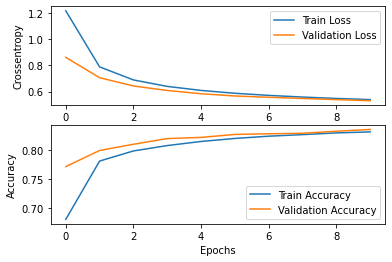

In [9]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Validation Loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label = 'Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'Validation Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()